Whilst Spark is amazing at handling big data sets, it isn't a great idea to plot all of it. We suggest taking a maximum of 5% of records for the tutorial. 

You can up it to your requirements, but we recommend sticking to less than 1 million records per month for visualization purposes.

**Project 1 Checklist:**
- You have justified your sample size (i.e due to runtime, distribution of data, etc)
- You have justified your sampling method (i.e random, stratified, etc)
- You have detailed in your report that you have sampled for visualization purposes BUT your analysis still uses the full distribution of data
- You mention any issues that can potentially be caused by sampling (i.e biased visualisation if using random)

Remember, it is your responsibility as the student (future Data Scientist) to convince the tutor (your stakeholders) that your justifications and assumptions are correct!

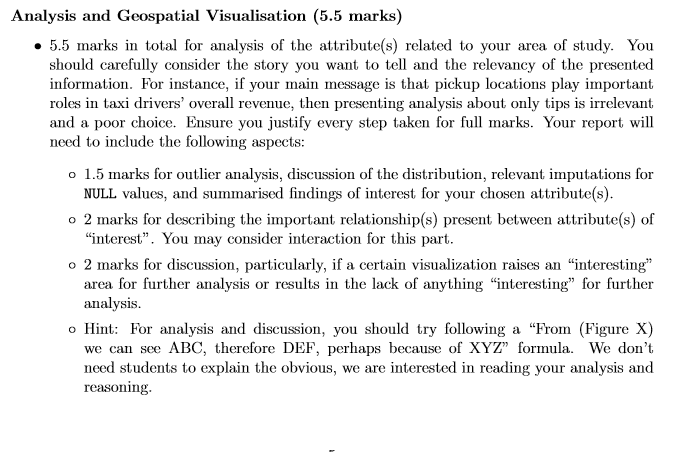

In [2]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034 Project 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC") # fix timestamps loaded by spark
    .getOrCreate()
)

your 131072x1 screen size is bogus. expect trouble
23/08/06 20:39:58 WARN Utils: Your hostname, DESKTOP-SATV84A resolves to a loopback address: 127.0.1.1; using 172.26.254.29 instead (on interface eth0)
23/08/06 20:39:58 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/06 20:39:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/08/06 20:40:00 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/08/06 20:40:00 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


# Exploratory Data Analysis

#### (Note that dataset shape can be distribution and / or dimensionality)

### Outlier analysis, discussion of the distribution, relevant imputations for NULL values, and summarsed findings of interest for the attributes

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#df = spark.read.parquet('../data/curated/combined.parquet')

df = pd.read_parquet('../data/curated/combined.parquet')

In [14]:
df.head()

df.columns

Index(['locationid', 'year', 'month', 'day_of_month', 'hour', 'day_of_week',
       'avg_usd_per_1/5_mile', 'avg_usd_per_minute', 'number_of_trips_here',
       'is_weekday', 'is_public_holiday', 'number_of_trips_nyc',
       'zone_profitability', 'number_of_airbnb_here',
       'avg_daily_airbnb_price_usd', 'number_of_hotels_here',
       'number_of_parking_munimeters_here', 'number_of_subway_stations_here',
       'total_pop', 'avg_income_per_cap', 'poverty_%', 'professional_%',
       'service_%', 'office_%', 'construction_%', 'production_%', 'drive_%',
       'carpool_%', 'transit_%', 'walk_%', 'work_at_home_%',
       'avg_commute_mins', 'private_work_%', 'public_work_%',
       'self_employed_%', 'unemployment_%'],
      dtype='object')

In [23]:
CORR_COLS = [
    "month", "day_of_month", "day_of_week", "avg_usd_per_1/5_mile", "avg_usd_per_minute",
    "number_of_trips_here", "is_weekday", "number_of_airbnb_here", "number_of_hotels_here", "number_of_subway_stations_here", 
    "avg_income_per_cap", "zone_profitability", "office_%", "carpool_%", "transit_%", "avg_commute_mins", "unemployment_%", "total_pop"
]

pd.set_option('display.max_columns', None)

df.corr()

#sns.heatmap(df[CORR_COLS].corr())
# wow that's easy...

#plt.title('Pearson Correlation Metric')
#plt.show()
## ... but is it really that easy? read below!

,locationid,year,month,day_of_month,hour,day_of_week,avg_usd_per_1/5_mile,avg_usd_per_minute,number_of_trips_here,is_weekday,is_public_holiday,number_of_trips_nyc,zone_profitability,number_of_airbnb_here,avg_daily_airbnb_price_usd,number_of_hotels_here,number_of_parking_munimeters_here,number_of_subway_stations_here,total_pop,avg_income_per_cap,poverty_%,professional_%,service_%,office_%,construction_%,production_%,drive_%,carpool_%,transit_%,walk_%,work_at_home_%,avg_commute_mins,private_work_%,public_work_%,self_employed_%,unemployment_%
locationid,1.000000,NaN,0.003193,0.000730,-0.029760,-0.004617,0.098784,0.067241,0.208195,-0.000234,0.004727,-0.046997,0.076725,-0.128356,0.324389,0.062461,0.065327,0.115318,-0.112353,0.421061,-0.358777,0.317318,-0.345087,-0.008524,-0.297691,-0.327286,-0.096902,-0.040280,-0.223454,0.137907,0.295663,-0.254860,0.179724,-0.302848,0.239361,-0.254789
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.003193,NaN,1.000000,-0.012204,-0.000943,0.013813,0.032014,-0.010238,0.018431,0.005361,0.042911,0.028554,0.003469,-0.001282,0.007011,0.003501,0.000190,-0.002720,-0.008219,0.010243,-0.004629,0.009889,-0.010405,-0.000587,-0.009901,-0.010508,-0.007473,-0.006012,-0.010550,0.010593,0.004383,-0.011110,0.009182,-0.010226,0.002195,-0.001790
day_of_month,0.000730,NaN,-0.012204,1.000000,-0.000925,-0.024365,0.001550,0.001049,-0.003159,0.005450,-0.021952,-0.007145,0.000790,-0.000698,-0.000673,-0.000245,-0.000460,0.000242,0.001077,-0.000954,0.000364,-0.001927,0.001412,0.001160,0.002680,0.002012,0.003846,0.002311,-0.000972,-0.000800,-0.000624,0.001630,-0.000191,0.000905,-0.001453,0.000447
hour,-0.029760,NaN,-0.000943,-0.000925,1.000000,0.000210,0.096410,-0.154779,0.246914,0.107769,-0.002669,0.656667,-0.019878,-0.034270,-0.031656,-0.018810,-0.047909,0.001041,-0.000411,-0.041693,0.024727,-0.029038,0.035223,-0.002988,0.024367,0.028054,0.016782,0.029552,0.043734,-0.042620,-0.005593,0.040416,-0.044680,0.050519,-0.011560,0.011745
day_of_week,-0.004617,NaN,0.013813,-0.024365,0.000210,1.000000,0.026435,-0.040917,0.038470,-0.003259,-0.106870,0.121795,0.000945,-0.000004,-0.005328,-0.002913,-0.006711,0.002125,0.002449,-0.007585,0.003489,-0.003789,0.005101,-0.002196,0.003007,0.004667,0.000099,0.000747,0.010749,-0.008984,0.000409,0.008093,-0.009646,0.009096,0.001275,0.001464
avg_usd_per_1/5_mile,0.098784,NaN,0.032014,0.001550,0.096410,0.026435,1.000000,0.376201,0.259749,0.083640,-0.018872,0.164530,0.302655,0.034766,0.151064,0.074757,0.125298,-0.016343,-0.050035,0.243785,-0.083819,0.246844,-0.236304,-0.065190,-0.242334,-0.241506,-0.204913,-0.195293,-0.186376,0.237208,0.104929,-0.255706,0.191043,-0.238115,0.107832,-0.023976
avg_usd_per_minute,0.067241,NaN,-0.010238,0.001049,-0.154779,-0.040917,0.376201,1.000000,-0.074635,-0.059194,0.033993,-0.253766,0.035912,-0.033390,-0.004170,0.019203,0.053878,-0.022710,0.018850,0.053931,-0.047375,0.025598,-0.046973,0.025882,0.006821,-0.028575,0.076888,0.035429,-0.071238,0.030412,-0.026729,-0.007943,0.045411,-0.039467,-0.018191,-0.005508
number_of_trips_here,0.208195,NaN,0.018431,-0.003159,0.246914,0.038470,0.259749,-0.074635,1.000000,0.078043,-0.051433,0.373965,0.231096,0.046425,0.301904,0.142504,0.330488,-0.070808,-0.149101,0.407225,-0.184412,0.300783,-0.308662,-0.092383,-0.236301,-0.321843,-0.147073,-0.182821,-0.392347,0.334927,0.214402,-0.271925,0.247119,-0.357793,0.205432,-0.050990
is_weekday,-0.000234,NaN,0.005361,0.005450,0.107769,-0.003259,0.083640,-0.059194,0.078043,1.000000,0.051566,0.171650,-0.007022,-0.020844,0.012488,0.005457,0.002637,-0.004647,-0.017105,0.016533,-0.007711,0.015231,-0.015237,-0.002602,-0.017341,-0.015348,-0.009725,-0.004358,-0.018233,0.016604,0.011062,-0.016532,0.011406,-0.011000,-0.000534,-0.003347


In [ ]:
compare top yellow earners to top green earners (max $ / mile or $ / hour for yellow and green, could show map)

plot zone profitability on map

plot holiday taxi demand or profitability vs non holiday taxi demand or profitability

plot weekday taxi demand or profitability vs non holiday taxi demand or profitability

investigate relationship of external data with taxi demand / zone profitability

create models for each borough separately potentialyl

check relationship between zone profitability / taxi demand and external datasets one at a time

recommend measuring taxi supply so a supply-to-demand ratio for each taxi zone can be actively tracked and utilised in predicting profitability of zones, as current modelling is limited by the fact that taxi demand has to be inferred from number of trips,
which does not perfectly capture how many taxis are available in an area vs the number of people who need taxi rides.

### Discuss the relationship between attributes of interest

## Personal Checklist for Visualisations and Dashboards:
1. Your visualisation needs to tell a story.
2. It should be interpretable without being overly verbose.
3. The scale and axis need to make sense (and you can assume the reader knows the difference between a normal scale vs log scale).
4. The choice of visualisation needs to make sense:
    - Line plot vs Bar chart with non-numerical categories
    - Map plot with points vs clusters for each location
    - Scatterplot vs Histogram plot to see distribution
    - etc
5. Choice of colour scheme / alpha / size need to be easy on the eyes.

At the end of the day, even if you think your visualisation is "pretty" or "beautiful", if a reader cannot understand it, then it is not a good visualisation.

Let's go through an example on **pickup locations**.

### Other Visualizations
We recommend that you plot and look at these attributes in your own time using `matplotlib` and `seaborn`.

Scatterplot of `fare_amount` vs `trip_amount`:  
- What's the relationship look like? 
- Why are there many values around 0?
    
    
Histogram and distribution plot of `fare_amount`, `trip_amount`, `trip_distance`:  
- Is the distribution skewed? 
- Does a log transformation make the distribution nicer? 
- What outliers do we have?
- What business rules should I be taking into account?
    
    
Correlation Heatmap between attributes of relevance:  
- Which attributes should we choose? Remember, Pearson's correlation only applies to numerical features and assumes a linear relationship.
- Does correlation imply causality?
    
You may also apply relevant transformations where suitable i.e `log`. Just make sure you **state it clearly** in your figure caption or legend.

A revision of skewness (in case you have forgotten and that's okay):

<img src=https://mammothmemory.net/images/user/base/Maths/Statistics%20and%20probability/Standard%20deviation/skewed-distribution-graphs.c97bc76.jpg alt-text="skew" width=800px>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.heatmap(df.corr())
# wow that's easy...

plt.title('Pearson Correlation Metric')
plt.show()
# ... but is it really that easy? read below!

Things to take note of:
- `trip_distance` highly correlates with high tips, tolls and overall trip amount
- `payment_type` seems to have some form of negative correlation with `tip_amount`. **Be careful as this is a discrete category.**
- Having `VendorID`, `PULocationID`, `DOLocationID`, etc as features **is misleading**, why??? 

**Important:** Only include numerical and ordinal features when computing the Pearson Correlation metric. You cannot compute the correlation between a category and numerical feature (i.e `VendorID` vs `payment_type` vs `trip_distance`).

How about Locations? Does correlation work for it?

In [ ]:
CORR_COLS = [
    "passenger_count", "trip_distance", "fare_amount", "extra", 
    "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", 
    "total_amount", "airport_fee"
]

sns.heatmap(df[CORR_COLS].corr())

plt.title('Pearson Correlation Metric')
plt.show()

- If you're interested in calculating correlation between nominal and continuous data, here's a [great explanation](https://stats.stackexchange.com/questions/119835/correlation-between-a-nominal-iv-and-a-continuous-dv-variable/124618#124618).   
- Remember, you need to refer back to the data dictionary as well as the fare page: https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page

- You should especially take note of the fare page if you're looking to see how `RatecodeID` plays a role on the fare.

## Plot relationships between features / attributes

## Research Goal: 
### - Which type of vehicle driver makes the most money per hour and why
### - Which periods of the year do vehicle drivers make the most money during and why (could use external datasets of when and where social events are occurring which increase taxi / fhv demand)
### - Which regions of NYC do vehicle drivers make the most money during and why
### - How can taxi / fhv drivers maximise tip amounts in general
### - When and where are traffic levels lowest during the year / day for NYC (requires external datasets)

### Could also go the passenger route
### - Which taxi / fhv service provides the cheapest service over the same distance
### - Which taxi / fhv service leads to the most pleasant experience (driver ratings, frequency of sharing with different passengers, wait times, etc.)